In [1]:
# import all relevant packages
import SimpleITK as sitk
%pylab
%matplotlib inline

Using matplotlib backend: <object object at 0x7fc1e01a5dc0>
Populating the interactive namespace from numpy and matplotlib


In [4]:
# set paths
# fixed_path = "/data/rohitrango/EMPIRE10/31_Fixed.mhd"
# moving_path = "/data/rohitrango/EMPIRE10/31_Moving.mhd"
# defX_path = "/data/rohitrango/EMPIRE10/defX.mhd"
# defY_path = "/data/rohitrango/EMPIRE10/defY.mhd"
# defZ_path = "/data/rohitrango/EMPIRE10/defZ.mhd"

idx = "05"
fixed_path = f"/data/rohitrango/EMPIRE10/scans/{idx}_Fixed.mhd"
moving_path = f"/data/rohitrango/EMPIRE10/scans/{idx}_Moving.mhd"
defX_path = f"/data/rohitrango/EMPIRE10/submission_v2/greedy_lungs/{idx}/defX.mhd"
defY_path = f"/data/rohitrango/EMPIRE10/submission_v2/greedy_lungs/{idx}/defY.mhd"
defZ_path = f"/data/rohitrango/EMPIRE10/submission_v2/greedy_lungs/{idx}/defZ.mhd"

In [5]:
fixed_image = sitk.ReadImage(fixed_path)
moving_image = sitk.ReadImage(moving_path)
dX, dY, dZ = [sitk.ReadImage(x) for x in [defX_path, defY_path, defZ_path]]

In [6]:
fixed_arr = sitk.GetArrayFromImage(fixed_image)
moving_arr = sitk.GetArrayFromImage(moving_image)
D, H, W = fixed_arr.shape

In [7]:
Z, Y, X = np.meshgrid(np.arange(D), np.arange(H), np.arange(W), indexing='ij')

In [8]:
X = X * fixed_image.GetSpacing()[0] + sitk.GetArrayFromImage(dX)
Y = Y * fixed_image.GetSpacing()[1] + sitk.GetArrayFromImage(dY)
Z = Z * fixed_image.GetSpacing()[2] + sitk.GetArrayFromImage(dZ)

In [9]:
X = X/moving_image.GetSpacing()[0]
Y = Y/moving_image.GetSpacing()[1]
Z = Z/moving_image.GetSpacing()[2]

In [10]:
from scipy.ndimage import map_coordinates

In [11]:
grid = np.stack([Z, Y, X], axis=0)
print(grid.shape)

(3, 408, 282, 412)


In [12]:
moved_arr = map_coordinates(moving_arr, grid)

In [13]:
moved_arr.shape, fixed_arr.shape

((408, 282, 412), (408, 282, 412))

(-0.5, 417.5, 293.5, -0.5)

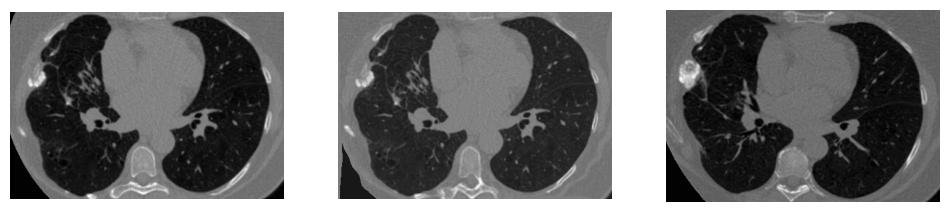

In [14]:
# plot this 
N = 200
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
axs[0].imshow(fixed_arr[N], cmap='gray'); axs[0].axis('off')
axs[1].imshow(moved_arr[N], cmap='gray'); axs[1].axis('off')
axs[2].imshow(moving_arr[N], cmap='gray'); axs[2].axis('off')

# N = 200
# axs[0].imshow(fixed_arr[:, N], cmap='gray'); axs[0].axis('off')
# axs[1].imshow(moved_arr[:, N], cmap='gray'); axs[1].axis('off')
# axs[2].imshow(moving_arr[:, N], cmap='gray'); axs[2].axis('off')